In [ ]:
%tensorflow_version

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

###Dataset
We will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [ ]:
faishon_mnist = keras.datasets.fashion_mnist #loading datasets

(train_images,train_labels),(test_images,test_labels) = faishon_mnist.load_data() #splitting data into testing and training

In [ ]:
train_images.shape

(60000, 28, 28)

We have 60000 images of size 28 by 28

In [ ]:
train_images[0,23,23] #lets have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [ ]:
train_labels[:10] #lets have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Finally what images looks like

In [ ]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.show()

##Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [ ]:
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
                         keras.layers.Dense(128,activation='relu'), # hidden layer (2)
                         keras.layers.Dense(10,activation='softmax')  # output layer (3)
])

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [ ]:
model.fit(train_images,train_labels,epochs=10) # we pass the data,labels, and epochs and watch the magic

##Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8846
Test accuracy: 88.45999836921692


To increase the accuracy , adjust the eopochs and the values you just passed


#PREDICTIONS

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([3.9891943e-09, 1.3553930e-08, 2.3253028e-08, 2.2036275e-08,
       5.2125678e-08, 1.1966575e-03, 1.6900949e-05, 8.9560188e-03,
       3.1389223e-07, 9.8982996e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

VERIFYING PREDICTIONS

Pick a number: 45


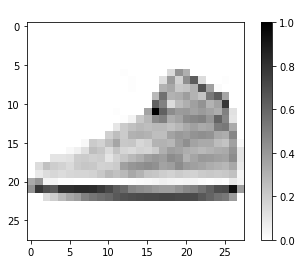

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
